In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import pydicom
import numpy as np
import fnmatch

In [2]:
root = "/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics"
folders = [x for x in os.listdir(root) if os.path.isdir(os.path.join(root, x))]
len(folders)

55

In [6]:
def find_folders_with_dcm_files(root_path):
    def is_ct_scan(dicom_folder):
        reader = sitk.ImageSeriesReader()
        dicom_names = reader.GetGDCMSeriesFileNames(dicom_folder)
        reader.SetFileNames(dicom_names)

        image = reader.Execute()
        modality = reader.GetMetaData(0, "0008|0060")

        return modality == "CT"
    
    def get_patient_id(path):
        path_comps = os.path.split(path)
        path_pat_id = path_comps.index("NSCLC Radiogenomics")
        return path_comps[path_pat_id + 1]
    
    folders_with_dcm = set()
    
    for dirpath, dirnames, filenames in os.walk(root_path):
        for filename in filenames:
            if fnmatch.fnmatch(filename, '*.dcm'):
                folders_with_dcm.add(dirpath)
                break

    folders_list = list(folders_with_dcm)
    paths_by_patient = dict()
    for folder_path in folders_list:
        if not is_ct_scan(folder_path):
            continue
        patient_id = get_patient_id(folder_path)
        if patient_id in paths_by_patient.keys():
            paths_by_patient[patient_id].append(folder_path)
        else:
            paths_by_patient[patient_id] = folder_path
        
        
dcm_paths = find_folders_with_dcm_files(root)
dcm_paths

{'/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-002/02-18-1992-NA-CT THORAX-01630/3.000000-Chest  1.0  B45f-08618',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-002/02-18-1992-NA-CT THORAX-01630/5395.000000-coronals-00215',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-003/02-22-1995-NA-ThoraxLOWDOSECHESTCTNONCON Adult-00343/2.000000-THORAX LUNG 2MM-68170',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-003/02-22-1995-NA-ThoraxLOWDOSECHESTCTNONCON Adult-00343/3.000000-THORAX LUNG 1MM-87644',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-003/02-22-1995-NA-ThoraxLOWDOSECHESTCTNONCON Adult-00343/5.000000-CORONAL MPR 2MM-03528',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-004/12-25-1992-NA-CT THORAX-53874/3.000000-Thorax  1.0  B45f-93537',
 '/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AM

In [3]:
patient_1 = folders[0]
path_patient_1 = os.path.join(root, patient_1)
sub_1 = [x for x in os.listdir(path_patient_1) if os.path.isdir(os.path.join(path_patient_1, x))]
sub_1

['02-18-1992-NA-CT THORAX-01630']

In [4]:
dicom_dir = "/home/rmaguado/rdt/DeepRDT/manifest-1722177583547/NSCLC Radiogenomics/AMC-002/02-18-1992-NA-CT THORAX-01630/3.000000-Chest  1.0  B45f-08618/"
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)
reader.SetFileNames(dicom_names)
image = reader.Execute()

img_spacing = image.GetSpacing()
img_size = image.GetSize()

In [11]:
image_array = sitk.GetArrayViewFromImage(image)
image_array = (image_array + 1024) / 2734
image_array.shape

(271, 512, 512)

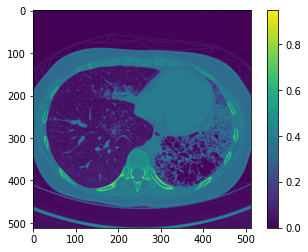

In [13]:
plt.imshow(image_array[100])
plt.colorbar()
plt.show()

In [3]:
df = pd.read_csv("data_labels.csv")
smokers = df[df["Smoking status"] == "Current"]
former = df[df["Smoking status"] == "Former"]
non = df[df["Smoking status"] == "Nonsmoker"]
print(len(smokers))
print(len(former))
print(len(non))


33
130
48


In [4]:
df.head()

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,...,Recurrence,Recurrence Location,Date of Recurrence,Date of Last Known Alive,Survival Status,Date of Death,Time to Death (days),CT Date,Days between CT and surgery,PET Date
0,AMC-001,Stanford,34,Not Collected,Male,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,yes,distant,10/7/1994,1/7/1997,Dead,1/7/1997,872.0,8/10/1994,9,Not Collected
1,AMC-002,Stanford,33,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,3/20/1992,Alive,NaN,NaN,2/19/1992,3,Not Collected
2,AMC-003,Stanford,69,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,6/19/1996,Alive,NaN,NaN,2/23/1995,28,Not Collected
3,AMC-004,Stanford,80,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,12/13/1996,Alive,NaN,NaN,12/26/1992,47,Not Collected
4,AMC-005,Stanford,76,Not Collected,Male,Not Recorded In Database,Former,30,1962.0,Not Assessed,...,yes,distant,1/4/1996,1/7/1997,Alive,NaN,NaN,7/21/1994,2,Not Collected
